In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

- Ref: https://answers.opencv.org/question/53293/how-to-remove-line-on-music-sheet/

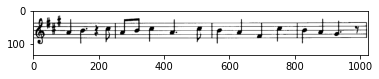

In [2]:
image = cv2.imread(r'\notes.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')

In [3]:
image.shape

(134, 1024)

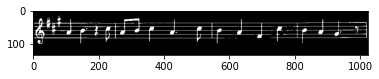

In [4]:
binImg = np.array([[255] * 1024] * 134)
binImg = binImg.astype(np.uint8)

for r in range(134):
    for c in range(1024):
        if (image[r][c] > 15):
            binImg[r][c] = 0
# using built-in cv2 image thresholding for shorter code

plt.imshow(binImg, cmap = 'gray')

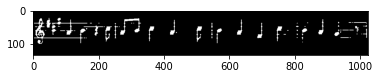

In [5]:
test = cv2.medianBlur(binImg, 3)
plt.imshow(cmap = 'gray', X = test)

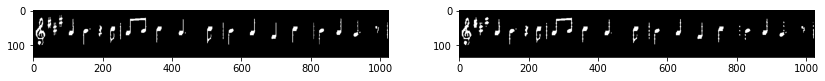

In [6]:
imgMod = cv2.morphologyEx(binImg, cv2.MORPH_OPEN, cv2.getStructuringElement(0, (1, 3)))

fig, axs = plt.subplots(1, 2)
fig.set_size_inches((14, 9))
axs[0].imshow(imgMod, cmap = 'gray')
axs[1].imshow(cv2.morphologyEx(test, cv2.MORPH_OPEN, cv2.getStructuringElement(1, (1, 3))), cmap = 'gray') # For fun

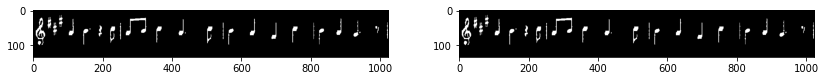

In [7]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((14, 9))
axs[0].imshow(imgMod, cmap = 'gray')

imgEdge = imgMod - cv2.morphologyEx(imgMod, cv2.MORPH_ERODE, cv2.getStructuringElement(2, (3, 3)))

axs[1].imshow(imgMod, cmap = 'gray')

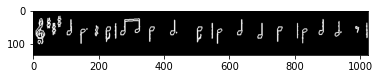

In [8]:
imgEdge = cv2.morphologyEx(imgEdge, cv2.MORPH_CLOSE, cv2.getStructuringElement(2, (2, 2)))
imgEdge = cv2.morphologyEx(imgEdge, cv2.MORPH_DILATE, cv2.getStructuringElement(2, (3, 3)))

plt.imshow(imgEdge, cmap = 'gray')

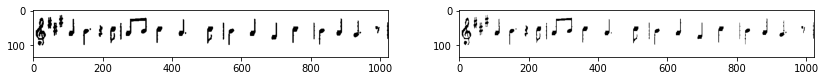

In [9]:
result = np.array([[13] * 1024] * 134)
resultNoSmooth = np.array([[255] * 1024] * 134)

for r in range(134):
    for c in range(1024):

        if imgMod[r][c] == 255:
            resultNoSmooth[r][c] = 0

        if imgEdge[r][c] == 255:
            result[r][c] = 0
        else:
            result[r][c] = 255 - imgMod[r][c]
# Use cv2 built-in func to simplify the above block of code

fig, axs = plt.subplots(1, 2)
fig.set_size_inches((14, 9))

axs[0].imshow(result, cmap = 'gray')
axs[1].imshow(resultNoSmooth, cmap = 'gray')